In [1]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


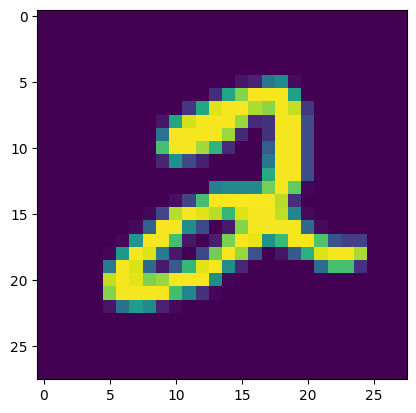

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

plt.imshow(X_train[5])
plt.show()

In [8]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [9]:
y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


In [10]:
model = Sequential()  # 모델 선언

In [11]:
# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

In [12]:
# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

In [13]:
# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 손실률: 0.08662549406290054
print("정확도:", acc)  # 정확도: 0.9779999852180481

Epoch 1/10


1500/1500 [==============================] - 3s 2ms/step - loss: 0.2791 - acc: 0.9211 - val_loss: 0.1598 - val_acc: 0.9528
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1251 - acc: 0.9637 - val_loss: 0.1148 - val_acc: 0.9657
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0860 - acc: 0.9743 - val_loss: 0.0959 - val_acc: 0.9712
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0634 - acc: 0.9810 - val_loss: 0.0909 - val_acc: 0.9728
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0491 - acc: 0.9851 - val_loss: 0.0883 - val_acc: 0.9723
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0396 - acc: 0.9875 - val_loss: 0.0937 - val_acc: 0.9733
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0303 - acc: 0.9910 - val_loss: 0.0891 - val_acc: 0.9748
Epoch 8/10
1500/1500 [==============================] - 2s 1

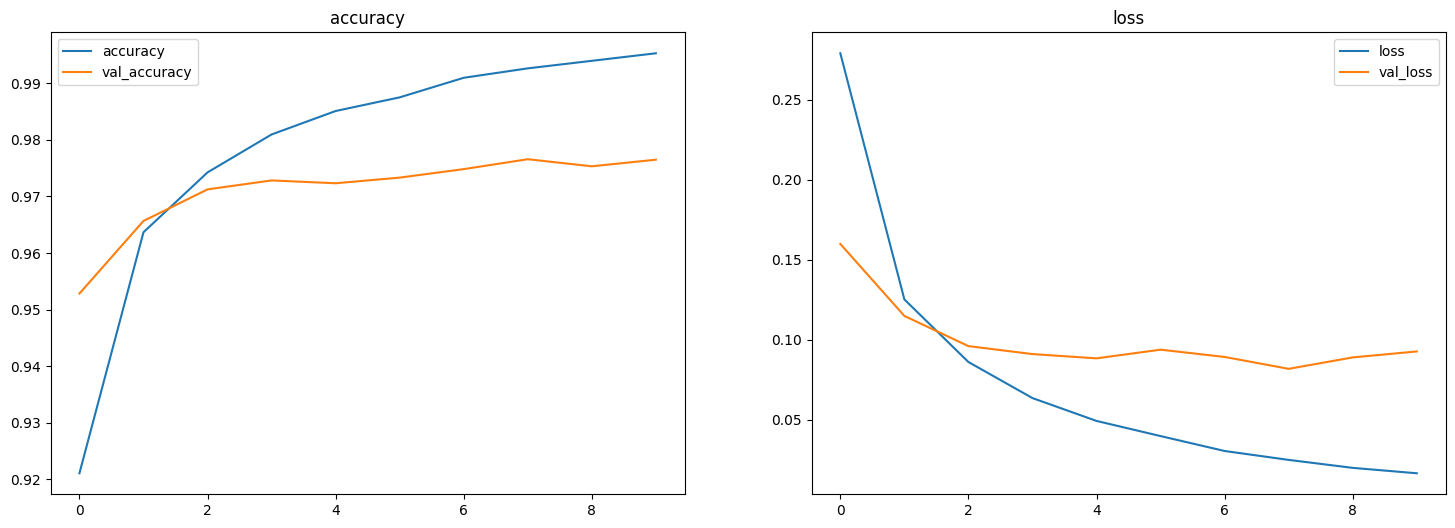

In [15]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [17]:
model.save(r"C:\Users\402-07\Practice_Mnist\Mnist_model.h5")
loaded_model = load_model(r"C:\Users\402-07\Practice_Mnist\Mnist_model.h5")